# Student Performance Indicator
## Life Cycle of Machine Learning Project
- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1. Problem Statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

### 2. Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

### 2.1 Import Data and Required Packages
Importing pandas, Numpy, Matplotlib, Seaborn and Warnings Library

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

##### Import the CSV Data as Pandas DataFrame

In [5]:
df = pd.read_csv('data/raw.csv')

##### Show Top 5 Records

In [6]:
df.head()

,_id,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,662384e9ded39eba46dec206,female,group B,bachelor's degree,standard,none,72,72,74
1,662384e9ded39eba46dec207,female,group C,some college,standard,completed,69,90,88
2,662384e9ded39eba46dec208,female,group B,master's degree,standard,none,90,95,93
3,662384e9ded39eba46dec209,male,group A,associate's degree,free/reduced,none,47,57,44
4,662384e9ded39eba46dec20a,male,group C,some college,standard,none,76,78,75


##### Shape of the Data set

In [7]:
df.shape

(1000, 9)

### 2.2 Dataset Information
- gender : sex of students -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced)
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

### 3. Data checks to perform
- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different - -  - categorical column

### 3.1 Checking the Missing values

In [8]:
df.isna().sum()

_id                            0
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### 3.2 Check Duplicates

In [10]:
df.duplicated().sum()

0

There are no duplicates

### 3.3 Check Data types

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   _id                          1000 non-null   object
 1   gender                       1000 non-null   object
 2   race/ethnicity               1000 non-null   object
 3   parental level of education  1000 non-null   object
 4   lunch                        1000 non-null   object
 5   test preparation course      1000 non-null   object
 6   math score                   1000 non-null   int64 
 7   reading score                1000 non-null   int64 
 8   writing score                1000 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 70.4+ KB


### 3.4 Checking the number of unique values of each column

In [12]:
df.nunique()

_id                            1000
gender                            2
race/ethnicity                    5
parental level of education       6
lunch                             2
test preparation course           2
math score                       81
reading score                    72
writing score                    77
dtype: int64

### 3.5 Checking the statistics of data set

In [13]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Insights

- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading much higher = 17

### 3.7 Exploring the data

In [17]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [21]:
print("Categories in 'gender' variable: ", end=" ")
print(df['gender'].unique())

print("Categories in 'race_ethinicity' variable: ", end=" ")
print(df['race/ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test preparation course'].unique())


Categories in 'gender' variable:  ['female' 'male']
Categories in 'race_ethinicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [23]:
# Define the Numberical and Categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# Print columns
print('We have {} numerical features: {}'.format(len(numeric_features), numeric_features))
print('We have {} categorical features: {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features: ['math score', 'reading score', 'writing score']
We have 5 categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [24]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [27]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total score']/3
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [28]:
reading_max = df[df['reading score'] == 100]['average'].count()
writing_max = df[df['writing score'] == 100]['average'].count()
math_max = df[df['math score'] == 100]['average'].count()

In [29]:
print(f'Number of students with full marks in Maths: {math_max}')
print(f'Number of students with full marks in Reading: {reading_max}')
print(f'Number of students with full marks in Writing: {writing_max}')

Number of students with full marks in Maths: 7
Number of students with full marks in Reading: 17
Number of students with full marks in Writing: 14


In [30]:
reading_less = df[df['reading score'] <= 20]['average'].count()
writing_less = df[df['writing score'] <= 20]['average'].count()
math_less = df[df['math score'] <= 20]['average'].count()

In [31]:
print(f'Number of students with marks less than 20 in Maths: {math_less}')
print(f'Number of students with marks less than 20 in Reading: {reading_less}')
print(f'Number of students with marks less than 20 in Writing: {writing_less}')

Number of students with marks less than 20 in Maths: 4
Number of students with marks less than 20 in Reading: 1
Number of students with marks less than 20 in Writing: 3


### Insights
- From the values we get students Performed worst in Maths
- Best Performance in reading section

## 4. Exploring Data Visualisation
### 4.1 Visualize average score distribution to make some conclusion
- Histograms
- Kernal Distribution Function (KDE)

### 4.1.1 Histogram & KDE

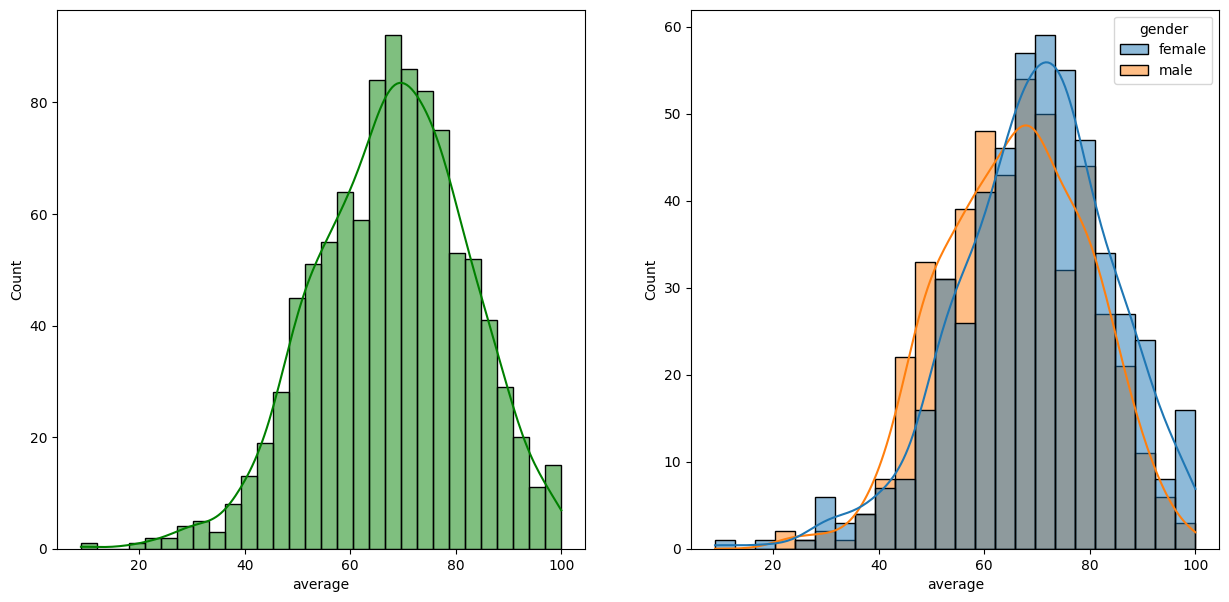

In [45]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

plt.subplot(121)
sns.histplot(data=df, x='average', bins=30, kde=True, color='g')

plt.subplot(122)
sns.histplot(data=df, x='average', kde=True, hue='gender')
plt.show()

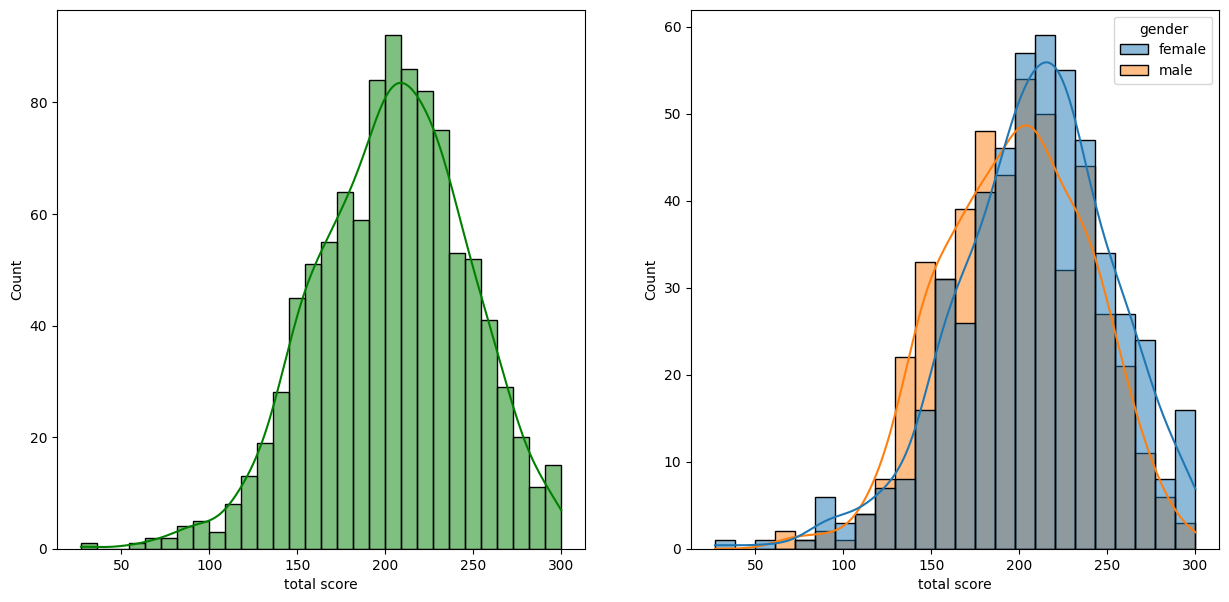

In [46]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

plt.subplot(121)
sns.histplot(data=df, x='total score', bins=30, kde=True, color='g')

plt.subplot(122)
sns.histplot(data=df, x='total score', kde=True, hue='gender')
plt.show()

### Insights
- Female students tend to perform well than male students

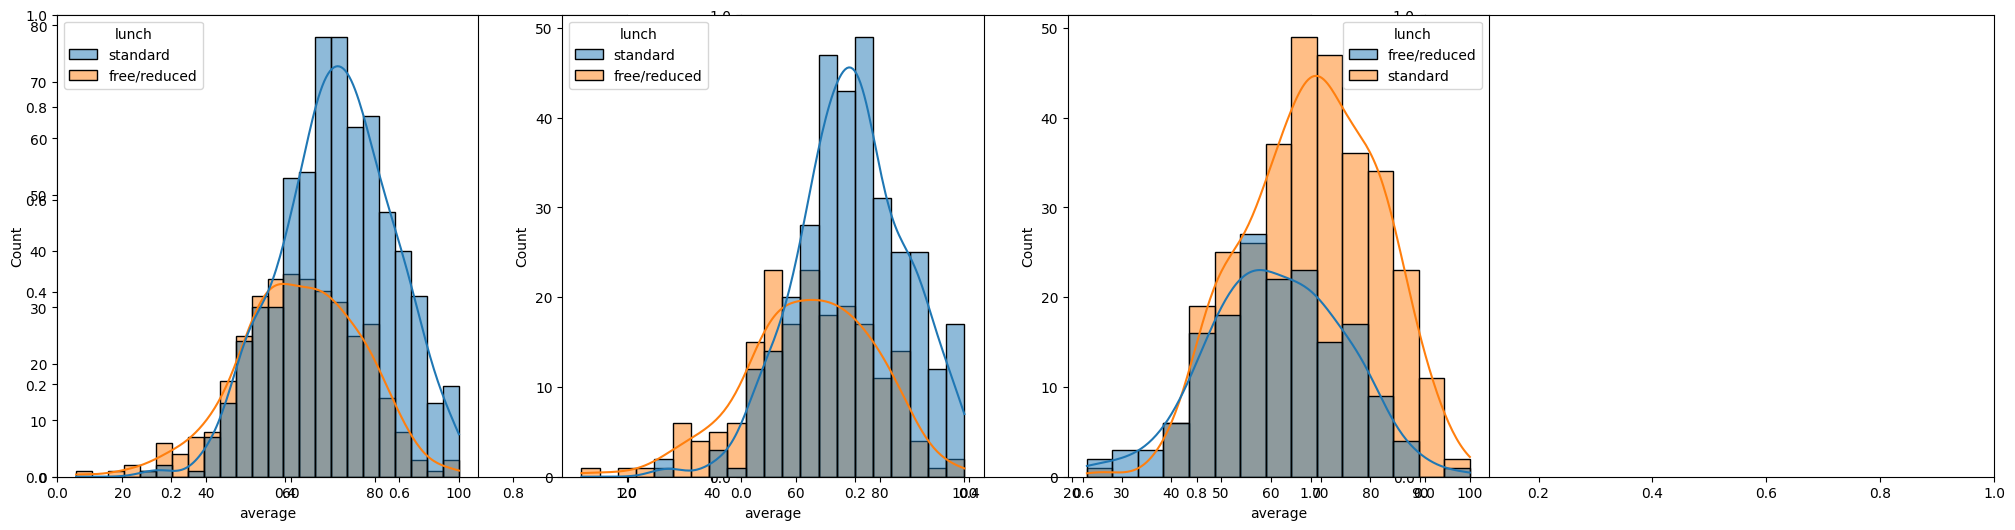

In [52]:
plt.subplots(1,3, figsize=(25,6))

plt.subplot(141)
sns.histplot(data=df, x='average', kde=True, hue='lunch')

plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='lunch')

plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='lunch')

plt.show()

### Insights
- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female

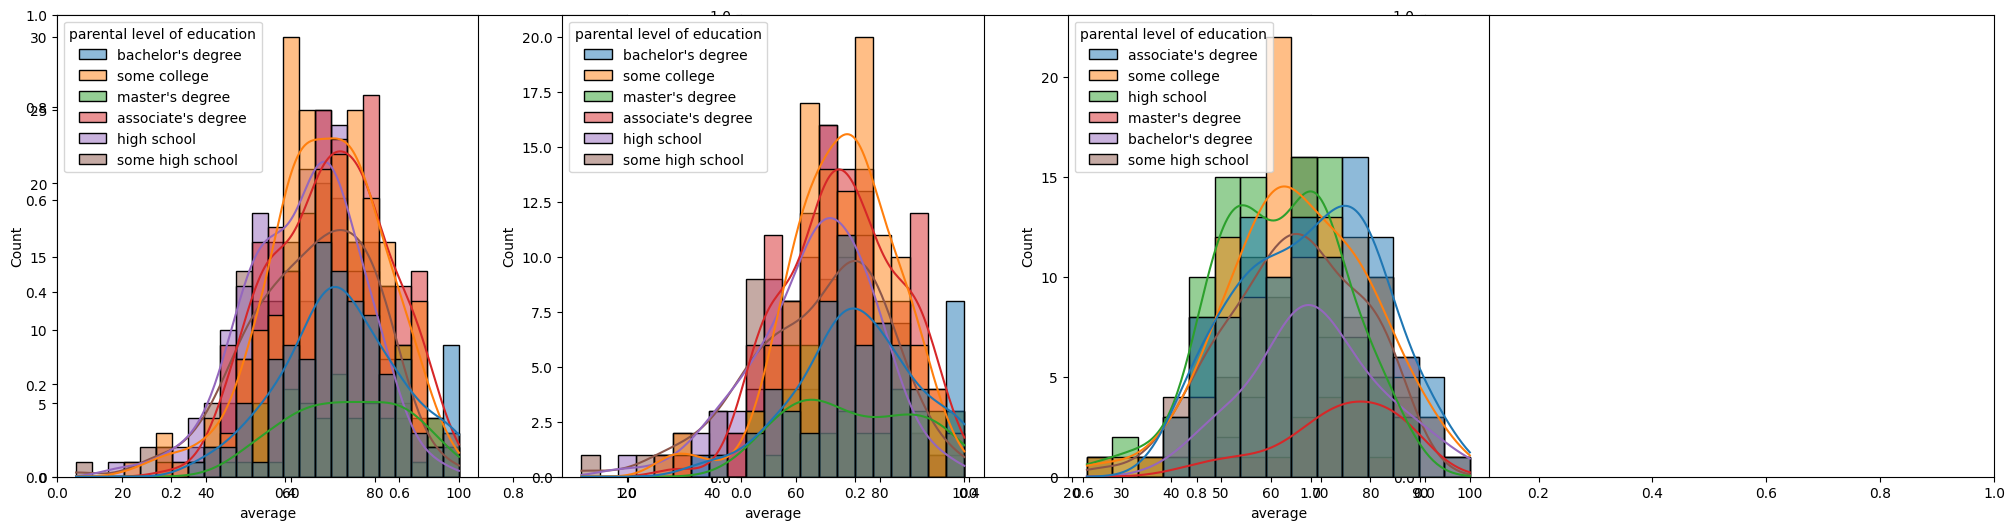

In [53]:
plt.subplots(1,3, figsize=(25,6))

plt.subplot(141)
sns.histplot(data=df, x='average', kde=True, hue='parental level of education')

plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='parental level of education')

plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='parental level of education')

plt.show()

### Insights
- Overall - Some college's students performing well > Associates' Degree > High school >~ Some High School >~ Bachelor's Degree > Master's Degree
- Female - Some college's students performing well > Associates' Degree > High school >~ Some High School >~ Bachelor's Degree > Master's Degree
- Male - Male students are performing in all the level of education except the lowest one Master's Degree and second lowest Bachelor's Degree

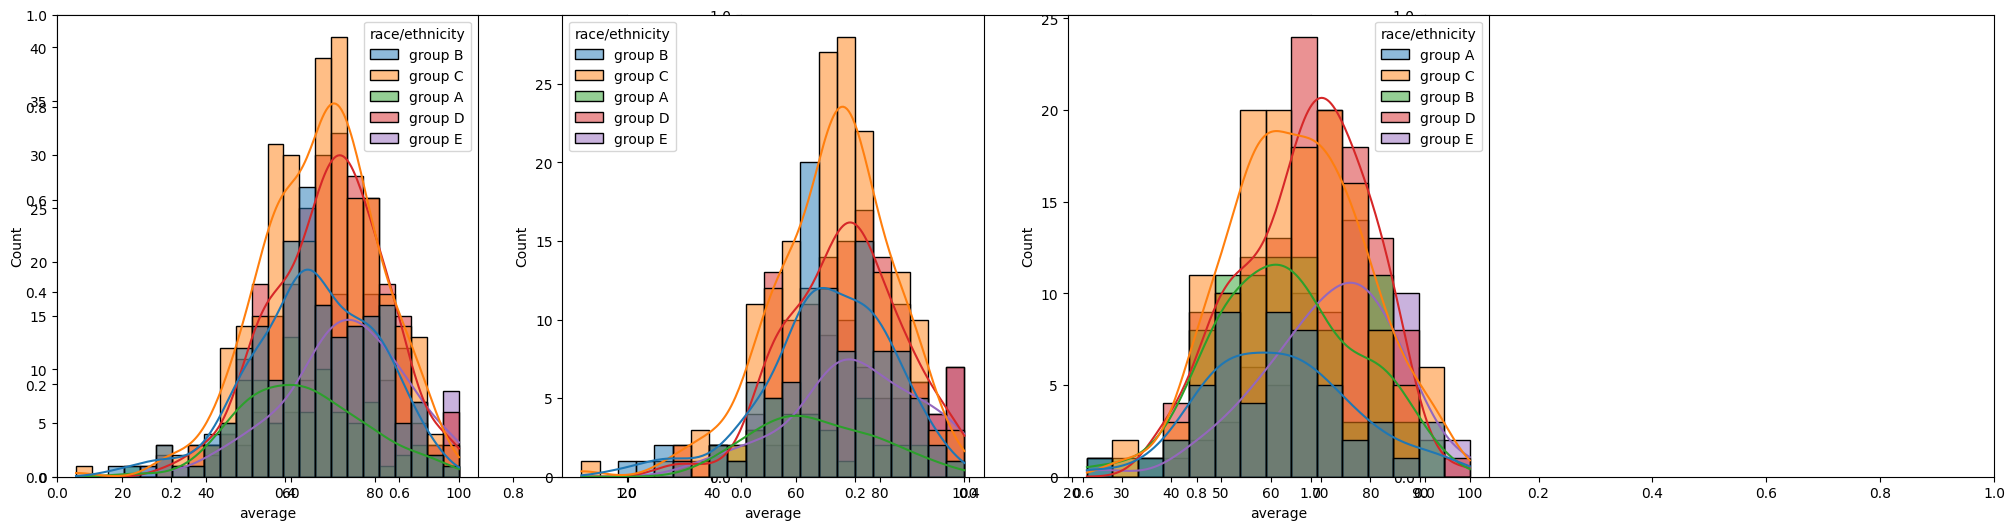

In [54]:
plt.subplots(1,3, figsize=(25,6))

plt.subplot(141)
sns.histplot(data=df, x='average', kde=True, hue='race/ethnicity')

plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='race/ethnicity')

plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='race/ethnicity')

plt.show()

### Insights
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female